In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.4 (Python 3.7.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



# Conversion of Centers to Averages

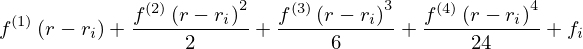

In [2]:
r0, r = symbols("r_i r")
f0, f1, f2, f3, f4 = symbols("f_i  f^{(1)} f^{(2)} f^{(3)} f^{(4)}")
f = f0 + f1*(r - r0) + f2*(r - r0)**2/2 + f3*(r - r0)**3/6 + f4*(r - r0)**4/24
f

In [3]:
dr = symbols("\Delta{}r")

In [4]:
rm12 = r0 - Rational(1,2)*dr
rp12 = r0 + Rational(1,2)*dr

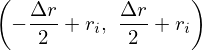

In [5]:
rm12, rp12

Next perform the integals of $f(x)$ over each zone

In [6]:
A = simplify(integrate(f*r/(r0*dr), (r, rm12, rp12)))

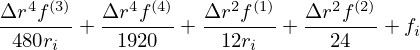

In [7]:
A

# Fourth-Order Interpolant in Axisymmetry

We want to construct a cubic polynomal through that goes through volumes $r_{i-2}$, $r_{i-1}$, $r_{i}$, $r_{i+1}$ and gives the correct averages,
$f_{i-2}$, $f_{i-1}$, $f_{i}$, and $f_{i+1}$ when integrated over the volume, e.g.

$$\frac{1}{r_i \Delta r} \int_{r_{i-1/2}}^{r_{i+1/2}} f(r) r dr = f_i$$

There are 4 unknowns in the quadratic and four constraints, so this is a linear system we can solve.

In [20]:
a, b, c, d = symbols("a b c d")
f = a*(r-r0)**3 + b*(r-r0)**2 + c*(r-r0) + d
f

In [21]:
dr = symbols("\Delta{}r")
dr

In [22]:
fm2, fm1, f0, fp1 = symbols("f_{i-2} f_{i-1} f_{i} f_{i+1}")

In [23]:
rm52 = r0 - Rational(5,2)*dr
rm32 = r0 - Rational(3,2)*dr
rm12 = r0 - Rational(1,2)*dr
rp12 = r0 + Rational(1,2)*dr
rp32 = r0 + Rational(3,2)*dr

In [28]:
rm2 = r0 - 2*dr
rm1 = r0 - dr
rp1 = r0 + dr

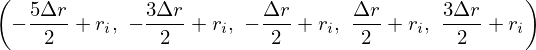

In [29]:
rm52, rm32, rm12, rp12, rp32

In [30]:
A = simplify(integrate(r*f/(dr*rm2), (r, rp52, rp32)))
B = simplify(integrate(r*f/(dr*rm1), (r, rm32, rm12)))
C = simplify(integrate(r*f/(dr*r0), (r, rm12, rp12)))
D = simplify(integrate(r*f/(dr*rp1), (r, rp12, rp32)))

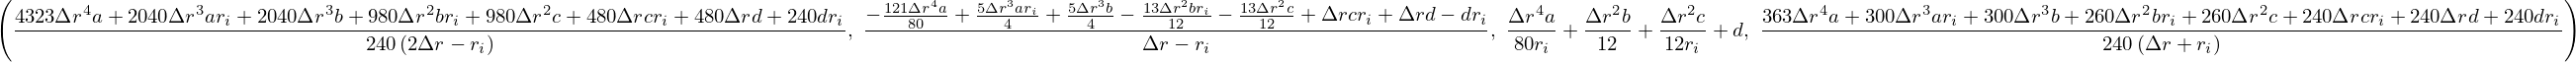

In [31]:
A, B, C, D

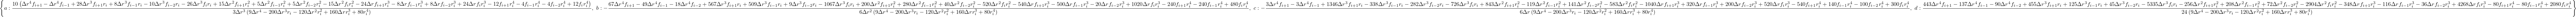

In [32]:
coeffs = solve([A-fm2, B-fm1, C-f0, D-fp1], [a,b,c,d], check=False)
coeffs

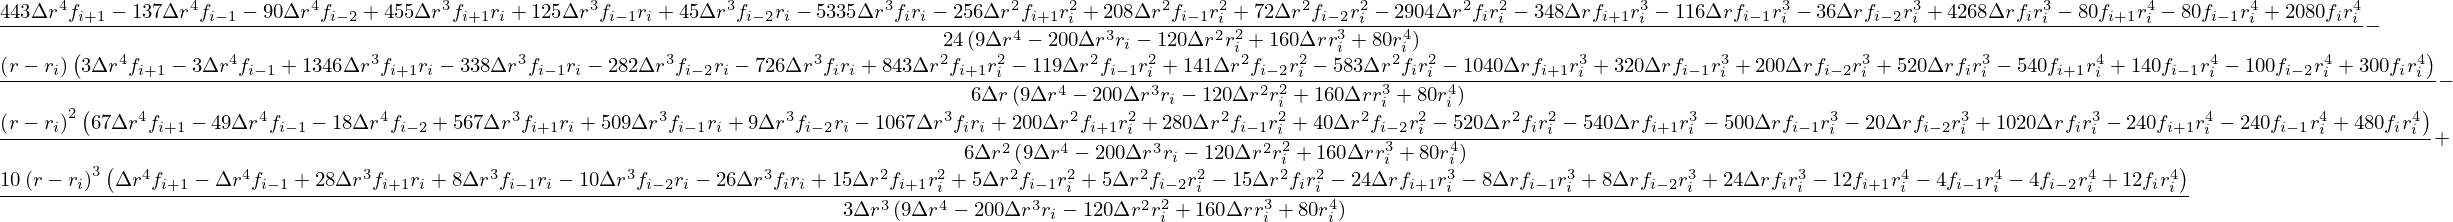

In [33]:
fc = f.subs(a,coeffs[a]).subs(b,coeffs[b]).subs(c,coeffs[c]).subs(d,coeffs[d])
fc

In [35]:
df = f.subs(r, rm12).subs(a,coeffs[a]).subs(b,coeffs[b]).subs(c,coeffs[c]).subs(d,coeffs[d])

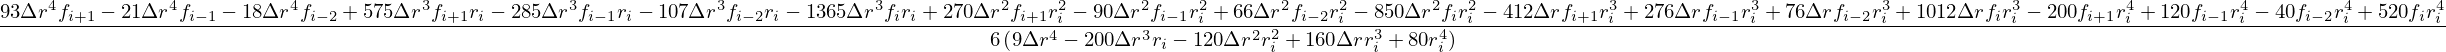

In [36]:
simplify(df)

This has the right asymptotic form as r -> oo

## modifed stencils at the left

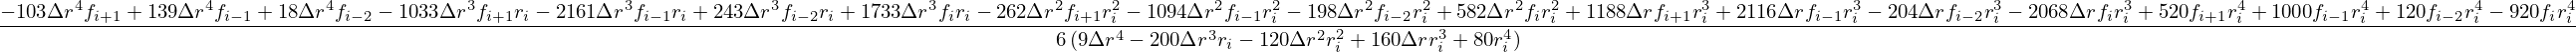

In [38]:
simplify(f.subs(r, rm32).subs(a,coeffs[a]).subs(b,coeffs[b]).subs(c,coeffs[c]).subs(d,coeffs[d]))

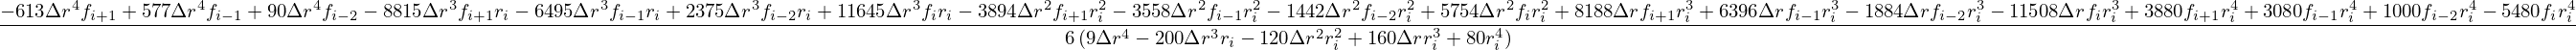

In [39]:
simplify(f.subs(r, rm52).subs(a,coeffs[a]).subs(b,coeffs[b]).subs(c,coeffs[c]).subs(d,coeffs[d]))